# Welcome to BlazingSQL Notebooks!

BlazingSQL Notebooks is a fully managed, high-performance JupyterLab environment. 

**No setup required.** You just login and start writing code, immediately.

Every Notebooks environment has:   
- An attached CUDA GPU
- Pre-Installed GPU Data Science Packages ([BlazingSQL](https://github.com/BlazingDB/blazingsql), [RAPIDS](https://github.com/rapidsai), [Dask](https://github.com/dask), and many more)

Start running GPU-accelerated code below!

## The DataFrame
The RAPIDS ecosystem is built on the concept of a shared GPU DataFrame between all of the different libraries and packages.

There are two libraries specific to data manipulation:
- **BlazingSQL**:  SQL commands on a GPU DataFrame
- **cuDF**: Pandas-like commands on a GPU DataFrame.

### BlazingSQL (BSQL) 
[GitHub](https://github.com/BlazingDB/blazingsql) | [Intro Notebook](intro_notebooks/blazingcontext.ipynb)

Let's see how easy it is to SQL query a CSV file on a GPU.

In [1]:
from blazingsql import BlazingContext

# initialize BlazingContext to launch a BSQL session
bc = BlazingContext()

BlazingContext ready


In [2]:
import os
# create a BlazingSQL table from any file w/ .create_table(table_name, file_path)
bc.create_table('taxi', f'{os.getcwd()}/data/sample_taxi.csv', header=0)

In [3]:
# query a table with the .sql() method 
bc.sql('SELECT * FROM taxi')

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_x,pickup_y,dropoff_x,dropoff_y
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,1,N,1,12.0,1.0,0.5,3.25,0.00,0.3,17.05,-8236962.878,66.693057,-8234835.381,66.694056
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,1,N,1,14.5,0.5,0.5,2.00,0.00,0.3,17.80,-8237825.768,66.642117,-8237020.631,66.710783
2,1,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,1,N,2,9.5,0.5,0.5,0.00,0.00,0.3,10.80,-8233561.431,66.796854,-8232278.987,66.839490
3,1,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,1,N,2,3.5,0.5,0.5,0.00,0.00,0.3,4.80,-8238653.836,66.621592,-8238123.872,66.633735
4,1,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,1,N,2,15.0,0.5,0.5,0.00,0.00,0.3,16.30,-8234433.662,66.717321,-8238107.735,66.678369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743655,1,2015-01-28 11:11:43,2015-01-28 11:29:03,1,2.60,1,N,1,12.5,0.0,0.5,1.50,0.00,0.3,14.80,-8233738.934,66.725941,-8236360.724,66.662901
743656,1,2015-01-28 11:11:43,2015-01-28 11:24:39,1,2.50,1,N,2,12.0,0.0,0.5,0.00,0.00,0.3,12.80,-8236326.753,66.619617,-8239263.633,66.604966
743657,1,2015-01-28 11:11:43,2015-01-28 11:19:05,1,0.50,1,N,1,6.0,0.0,0.5,1.70,0.00,0.3,8.50,-8237036.767,66.674845,-8236477.079,66.687925
743658,1,2015-01-28 11:11:43,2015-01-28 11:35:15,1,9.10,1,N,1,28.5,0.0,0.5,6.92,5.33,0.3,41.55,-8223703.602,66.740356,-8233243.793,66.732021


Learn more about [creating](intro_notebooks/create_tables.ipynb) and [querying](intro_notebooks/query_tables.ipynb) BlazingSQL tables, or the [BlazingContext API](intro_notebooks/blazingcontext.ipynb).

BlazingSQL returns each query's results as a cuDF DataFrame, making for easy handoff to GPU or non-GPU solutions.

In [4]:
type(bc.sql('select * from taxi'))

cudf.core.dataframe.DataFrame

### cuDF
[GitHub](https://github.com/rapidsai/cudf) | [Intro Notebook](intro_notebooks/bsql_cudf.ipynb)

cuDF is a GPU DataFrame Library similar to Pandas.

In [5]:
# keep results DataFrame as variable
gdf = bc.sql('select * from taxi where trip_distance < 10')

In [6]:
# utilize DataFrame methods like .head() or .tail()
gdf.tail(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_x,pickup_y,dropoff_x,dropoff_y
731204,1,2015-01-28 11:11:43,2015-01-28 11:35:15,1,9.1,1,N,1,28.5,0.0,0.5,6.92,5.33,0.3,41.55,-8223703.602,66.740356,-8233243.793,66.732021
731205,1,2015-01-28 11:11:44,2015-01-28 11:21:56,1,1.5,1,N,2,8.5,0.0,0.5,0.00,0.00,0.3,9.30,-8232741.006,66.735944,-8234567.002,66.711625


In [7]:
# tell me about the taxi rides under 10 miles
gdf.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_x,pickup_y,dropoff_x,dropoff_y
count,731206.000000,731206.000000,731206.000000,731206.000000,731206.000000,731206.000000,731206.000000,731206.000000,731206.000000,731206.000000,731206.000000,731206.000000,7.312060e+05,731206.000000,7.312060e+05,731206.000000
mean,1.525141,1.683695,2.110928,1.008933,1.388211,10.023943,0.315833,0.499003,1.300654,0.085120,0.283192,12.523875,-8.235333e+06,66.699610,-8.235131e+06,66.700190
std,0.499368,1.342609,1.735554,0.509256,0.497665,5.848819,0.366803,0.025225,1.621419,0.714763,0.068992,7.037828,2.397015e+03,0.043212,2.541876e+03,0.048194
min,1.000000,0.000000,0.000000,1.000000,1.000000,-52.000000,-1.000000,-0.500000,-81.000000,-5.330000,0.000000,-116.220000,-8.254080e+06,66.555036,-8.254078e+06,66.555036
25%,1.000000,1.000000,0.970000,1.000000,1.000000,6.000000,0.000000,0.500000,0.000000,0.000000,0.300000,8.000000,-8.236762e+06,66.670578,-8.236706e+06,66.669526
50%,2.000000,1.000000,1.570000,1.000000,1.000000,8.500000,0.000000,0.500000,1.000000,0.000000,0.300000,10.800000,-8.235663e+06,66.702066,-8.235514e+06,66.702750
75%,2.000000,2.000000,2.620000,1.000000,2.000000,12.000000,0.500000,0.500000,2.000000,0.000000,0.300000,14.800000,-8.234246e+06,66.728564,-8.233885e+06,66.730946
max,2.000000,9.000000,9.990000,99.000000,4.000000,900.000000,7.000000,0.500000,200.000000,117.820000,0.300000,900.300000,-8.210362e+06,66.870206,-8.210008e+06,66.870153


In [8]:
# or convert from cuDF .to_pandas() for access to pandas methods like .sample()
gdf.to_pandas().sample(3)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_x,pickup_y,dropoff_x,dropoff_y
75996,1,2015-01-16 07:32:57,2015-01-16 07:51:19,1,3.60,1,N,1,15.0,0.0,0.5,1.00,0.0,0.3,16.80,-8234643.440,66.689195,-8238740.464,66.637400
498436,1,2015-01-02 23:37:08,2015-01-02 23:40:54,1,1.10,1,N,1,5.0,0.5,0.5,0.88,0.0,0.0,7.18,-8237033.370,66.711189,-8235939.471,66.732404
174726,2,2015-01-01 20:50:25,2015-01-01 21:00:24,1,2.09,1,N,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80,-8235299.099,66.715923,-8237881.821,66.683740


In [ ]:
gdf.loc[(gdf['passenger_count'] > 1) & (gdf['trip_distance'] < 10)]

Learn more about [BlazingSQL + cuDF](intro_notebooks/bsql_cudf.ipynb).

## Data Visualization

Leverage your favorite Python visualization packages by converting a GPU DataFrame to a Pandas DataFrame with `.to_pandas()` or visualization packages that are GPU accelerated.

### pandas

In [9]:
# matplotlib/seaborn on a .to_pandas() gdf
df = gdf.to_pandas()

corr = df.corr()

corr.style.background_gradient(cmap='coolwarm')

,VendorID,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_x,pickup_y,dropoff_x,dropoff_y
VendorID,1,0.300415,0.0134865,-0.00954139,-0.0109922,0.00054661,0.00978352,0.00600686,-0.0140123,0.000827743,0.242477,-0.00220255,0.00819894,0.00765405,0.00166011,0.0063376
passenger_count,0.300415,1,0.011369,-0.00500232,0.0129397,0.00705409,0.00707483,0.00494319,-0.0120395,0.00198081,0.0461175,0.00367589,-0.00255839,-0.00242958,-0.00305241,-0.000809237
trip_distance,0.0134865,0.011369,1,0.00024166,-0.096784,0.868309,0.0419097,0.0153111,0.436598,0.384614,-0.0145,0.863531,0.179701,-0.0478547,0.275943,-0.0464625
RatecodeID,-0.00954139,-0.00500232,0.00024166,1,-0.000873064,0.0642373,-0.0126771,-0.190085,0.0264905,0.0482353,-0.00321169,0.0630212,0.000549908,-0.00166146,-0.0077436,-0.0012608
payment_type,-0.0109922,0.0129397,-0.096784,-0.000873064,1,-0.0958878,-0.0321674,-0.046517,-0.625704,-0.0347788,-0.0460312,-0.229289,0.0503822,0.0676946,0.0533836,0.0652849
fare_amount,0.00054661,0.00705409,0.868309,0.0642373,-0.0958878,1,0.00570523,-0.0786584,0.447769,0.347415,0.00293214,0.969585,0.13147,-0.0471895,0.201827,-0.0586293
extra,0.00978352,0.00707483,0.0419097,-0.0126771,-0.0321674,0.00570523,1,0.0404017,0.0439271,-0.0071043,0.0343127,0.0664517,-0.0305436,-0.0529642,0.0304004,-0.0210435
mta_tax,0.00600686,0.00494319,0.0153111,-0.190085,-0.046517,-0.0786584,0.0404017,1,-0.0268044,-0.0782429,0.00534126,-0.0727929,-0.00138103,0.00344616,0.0144585,0.00311648
tip_amount,-0.0140123,-0.0120395,0.436598,0.0264905,-0.625704,0.447769,0.0439271,-0.0268044,1,0.256771,0.0266415,0.630799,0.0592536,-0.0530783,0.0681297,-0.0640568
tolls_amount,0.000827743,0.00198081,0.384614,0.0482353,-0.0347788,0.347415,-0.0071043,-0.0782429,0.256771,1,0.0017574,0.448789,0.291352,0.0546995,0.187451,0.0364687


### Matplotlib

In [19]:
set(df['passenger_count'].values)

{0, 1, 2, 3, 4, 5, 6, 9}

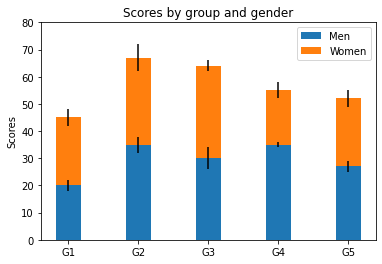

In [10]:
import numpy as np
import matplotlib.pyplot as plt

p_counts = df['passenger_count'].values


N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

### Datashader

In [ ]:
import datashader as ds
from colorcet import fire

# execute query & lay out a canvas w/ dropoff locations 
nyc = ds.Canvas().points(bc.sql('SELECT dropoff_x, dropoff_y FROM taxi'), 'dropoff_x', 'dropoff_y')

# shade in the picture w/ fire & display
ds.transfer_functions.set_background(ds.transfer_functions.shade(nyc, cmap=fire), "black")

## Machine Learning
### cuML 

cuML is a GPU-accelerated machine learning library similar to scikit-learn but made to run on the GPU DataFrame.

Let's predict fare amount of the `taxi` table we've been querying with a linear regression model.

In [ ]:
%%time
from cuml import LinearRegression
from cuml.preprocessing.model_selection import train_test_split

# pull feature (X) and target (y) values
X = bc.sql('SELECT trip_distance, tolls_amount FROM taxi')
y = bc.sql('SELECT fare_amount FROM taxi')['fare_amount']

# split data into train and test sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [ ]:
%%time
# call Linear Regression model
lr = LinearRegression()

# train the model
lr.fit(X_train, y_train)

# make predictions for test X values
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

# convert test & predicted values .to_pandas() & find the model's r2_score
r2_score(y_true=y_test.to_pandas(), y_pred=y_pred.to_pandas())

## Graph Analytics

### cuGraph - RAPIDS Graph Analytics Library

Run graph analytics on GPU DataFrames with cuGraph, which aims to provide a NetworkX-like API on GPU DataFrames.

Pending resolution of [rapidsai/cugraph#744](https://github.com/rapidsai/cugraph/issues/744).

In [ ]:
# import cugraph

# # assuming that data has been loaded into a cuDF (using read_csv) Dataframe
# bc.create_table('karate', f'{os.getcwd()}/data/karate.csv', names=["src", "dst"], delimiter='\t', dtype=["float", "float"])

# # create a Graph using the source (src) and destination (dst) vertex pairs the GDF  
# G = cugraph.Graph()
# G.add_edge_list(gdf, source='src', destination='dst')  # ERROR

# # Call cugraph.pagerank to get the pagerank scores
# gdf_page = cugraph.pagerank(G)

# for i in range(len(gdf_page)):
#     print("vertex " + str(gdf_page['vertex'][i]) + " PageRank is " + str(gdf_page['pagerank'][i]))  

### cuSignal - GPU-Accelerated Signal Processing

cuSignal is a direct port of Scipy Signal built to leverage GPU compute resources through cuPy and Numba.

<details><summary>...</summary>

The RAPIDS cuSignal project leverages CuPy, Numba, and the RAPIDS ecosystem for GPU accelerated signal processing. 
    
In some cases, cuSignal is a direct port of Scipy Signal to leverage GPU compute resources via CuPy but also contains Numba CUDA kernels for additional speedups for selected functions. 
    
cuSignal achieves its best gains on large signals and compute intensive functions but stresses online processing with zero-copy memory (pinned, mapped) between CPU and GPU.

[GitHub](https://github.com/rapidsai/cusignal) | [Intro Notebook](intro_notebooks/cusignal.ipynb)

</details>

In [ ]:
import cusignal
import cupy as cp

start = 0
stop = 10
num_samps = int(1e8)
resample_up = 2
resample_down = 3

gx = cp.linspace(start, stop, num_samps, endpoint=False) 
gy = cp.cos(-gx**2/6.0)

gf = cusignal.resample_poly(gy, resample_up, resample_down, window=('kaiser', 0.5))

In [ ]:
gf

#### Storage Plugins - Scale Your Data

<details><summary>...</summary>
    
We think you should let data rest wherever it likes. Don't worry about synching, directly query files wherever they reside.

With the BlazingSQL Filesystem API, you can register and connect to multiple storage solutions. 

- [AWS](https://docs.blazingdb.com/docs/s3) 
- [Google Storage](https://docs.blazingdb.com/docs/google-cloud-storage)
- [HDFS](https://docs.blazingdb.com/docs/hdfs)

Once a filesystem is registered you can reference the user-defined file path when creating a new table off of a file.
    
[Docs](https://docs.blazingdb.com/docs/connecting-data-sources) | [Intro notebook](intro_notebooks/storage_plugins.ipynb)
    
</details>

In [ ]:
# register AWS S3 storage bucket 
bc.s3('bsql_data', bucket_name='blazingsql-colab')

# tag S3 {s3://} file path to specific data directory within 'bsql_data'
tpch_sf10 = 's3://bsql_data/tpch_sf10/'

# create 'orders' table from list of 10 orders files
bc.create_table('orders', [f'{tpch_sf10}orders/0_0_{i}.parquet' for i in range(10)])

#### BlazingSQL Logs

<details><summary>...</summary>
    
BlazingSQL has an internal log that records events from every node from all queries run. The events include runtime query step execution information, performance timings, errors and warnings. 

The logs table is called `bsql_logs`. You can query the logs as if it were any other table, except you use the `.log()` function, instead of the `.sql()` function.
    
[Docs](https://docs.blazingdb.com/docs/blazingsql-logs) | [Intro Notebook](intro_notebooks/bsql_logs.ipynb)
    
</details>

In [ ]:
# how long did each successfully run query take?
bc.log("SELECT log_time, query_id, duration FROM bsql_logs WHERE info = 'Query Execution Done' ORDER BY log_time DESC")

#### Cyber Log Accelerators 

RAPIDS Cyber Log Accelerators (CLX)

<details><summary>...</summary>
    
CLX ("clicks") provides a collection of RAPIDS examples for security analysts, data scientists, and engineers to quickly get started applying RAPIDS and GPU acceleration to real-world cybersecurity use cases.

The goal of CLX is to:

- Allow cyber data scientists and SecOps teams to generate workflows, using cyber-specific GPU-accelerated primitives and methods, that let them interact with code using security language,
- Make available pre-built use cases that demonstrate CLX and RAPIDS functionality that are ready to use in a Security Operations Center (SOC),
- Accelerate log parsing in a flexible, non-regex method. and
- Provide SIEM integration with GPU compute environments via RAPIDS and effectively extend the SIEM environment.
    
[GitHub](https://github.com/rapidsai/clx) | [Intro Notebook](intro_notebooks/clx.ipynb)
    
</details>

In [ ]:
import cudf
import s3fs
from os import path

# download data
if not path.exists("./splunk_faker_raw4"):
    fs = s3fs.S3FileSystem(anon=True)
    fs.get("rapidsai-data/cyber/clx/splunk_faker_raw4", "./splunk_faker_raw4")

# read in alert data
gdf = cudf.read_csv('./splunk_faker_raw4')
gdf.columns = ['raw']

# parse the alert data using CLX built-in parsers
from clx.parsers.splunk_notable_parser import SplunkNotableParser

snp = SplunkNotableParser()
parsed_gdf = cudf.DataFrame()
parsed_gdf = snp.parse(gdf, 'raw')

# define function to round time to the day
def round2day(epoch_time):
    return int(epoch_time/86400)*86400

# aggregate alerts by day
parsed_gdf['time'] = parsed_gdf['time'].astype(int)
parsed_gdf['day'] = parsed_gdf.time.applymap(round2day)
day_rule_gdf = parsed_gdf[['search_name','day','time']].groupby(['search_name', 'day']).count().reset_index()
day_rule_gdf.columns = ['rule', 'day', 'count']

# import the rolling z-score function from CLX statistics
from clx.analytics.stats import rzscore

# pivot the alert data so each rule is a column
def pivot_table(gdf, index_col, piv_col, v_col):
    index_list = gdf[index_col].unique()
    piv_gdf = cudf.DataFrame()
    piv_gdf[index_col] = index_list
    for group in gdf[piv_col].unique():
        
        temp_df = gdf[gdf[piv_col] == group]
        temp_df = temp_df[[index_col, v_col]]
        temp_df.columns = [index_col, group]
        piv_gdf = piv_gdf.merge(temp_df, on=[index_col], how='left')
        
    piv_gdf = piv_gdf.set_index(index_col)
    return piv_gdf.sort_index()

alerts_per_day_piv = pivot_table(day_rule_gdf, 'day', 'rule', 'count').fillna(0)

# create a new cuDF with the rolling z-score values calculated
r_zscores = cudf.DataFrame()
for rule in alerts_per_day_piv.columns:
    x = alerts_per_day_piv[rule]
    r_zscores[rule] = rzscore(x, 7) #7 day window

In [ ]:
r_zscores

In [ ]:
temp_df

In [ ]:
day_rule_gdf

BlazingSQL is built on top of the RAPIDS AI ecosystem. RAPIDS is based on the Apache Arrow columnar memory format, and cuDF is a GPU DataFrame library for loading, joining, aggregating, filtering, and otherwise manipulating data.

BlazingSQL is a SQL interface for cuDF, with various features to support large scale data science workflows and enterprise datasets.

Query Data Stored Externally - a single line of code can register remote storage solutions, such as Amazon S3.
Simple SQL - incredibly easy to use, run a SQL query and the results are GPU DataFrames (GDFs).
Interoperable - GDFs are immediately accessible to any RAPIDS library for data science workloads.
    
BlazingContext is the Python API of BlazingSQL. 
    
Initializing BlazingContext connects allows you to create tables, run queries and utilize the power of GPU accelerated SQL.


### Datashader

Datashader is a data visualization library  Quickly and accurately render even the largest data.

<details><summary>...</summary>
    
Datashader is a data rasterization pipeline for automating the process of creating meaningful representations of large amounts of data. Datashader breaks the creation of images of data into 3 main steps:

1. Projection

  - Each record is projected into zero or more bins of a nominal plotting grid shape, based on a specified glyph.

2. Aggregation

  - Reductions are computed for each bin, compressing the potentially large dataset into a much smaller aggregate array.

3. Transformation

  - These aggregates are then further processed, eventually creating an image.

Using this very general pipeline, many interesting data visualizations can be created in a performant and scalable way. Datashader contains tools for easily creating these pipelines in a composable manner, using only a few lines of code. Datashader can be used on its own, but it is also designed to work as a pre-processing stage in a plotting library, allowing that library to work with much larger datasets than it would otherwise.
    
Datashader is part of the [HoloViz](https://github.com/holoviz) ecosystem for making browser-based data visualization in Python easier to use, easier to learn, and more powerful. See [holoviz.org](https://holoviz.org/) for related packages that you can use with Datashader and [status.holoviz.org](http://status.holoviz.org/) for the current status of each HoloViz project.

Datashader is supported and maintained by [Anaconda](https://anaconda.com/).
    
[GitHub](https://github.com/holoviz/datashader/) | [Intro Notebook](intro_notebooks/cuml.ipynb)

</details>

In [ ]:

<details><summary>...</summary>

cuML is a suite of libraries that implement machine learning algorithms and mathematical primitives functions that share compatible APIs with other RAPIDS projects.

cuML enables data scientists, researchers, and software engineers to run traditional tabular ML tasks on GPUs without going into the details of CUDA programming. In most cases, cuML's Python API matches the API from scikit-learn.

For large datasets, these GPU-based implementations can complete 10-50x faster than their CPU equivalents. For details on performance, see the cuML Benchmarks Notebook.
    
[GitHub](https://github.com/rapidsai/cuml) | [Intro Notebook](intro_notebooks/cuml.ipynb)

</details>

In [ ]:
<details><summary>...</summary>

The RAPIDS cuGraph library is a collection of graph analytics that process data found in GPU Dataframes - see cuDF.

cuGraph aims to provide a NetworkX-like API that will be familiar to data scientists, so they can now build GPU-accelerated workflows more easily.
    
[GitHub](https://github.com/rapidsai/cugraph) | [Intro Notebook](intro_notebooks/cugraph.ipynb)

</details>